PRAVEENA ANAND [CH.SC.U4CSE23044]

**K - NEAREST NEIGHBOURS:**

**Breast Cancer Detection Dataset:**

Importing Required Libraries:

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

Importing (Reading) Datasets:

In [17]:
data = pd.read_csv('/content/breast-cancer.csv')
print(data.shape)
data.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Check For Any Null Values in the Dataset:

In [18]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Assigning Dependent and Independent Variables:

In [20]:
x = data.drop('diagnosis', axis=1)
y = data['diagnosis']

Splitting the Dataset into Training and Testing Dataset:

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size=0.3, random_state=0)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(398, 31)

(398,)

(171, 31)

(171,)

Preprocessing Data with StandardScaler:

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Training the Model Using KNN (Minkoski):

In [25]:
results=[]
for i in [1,2,3,4,5]:
  model = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)
  Accuracy_score=metrics.accuracy_score (y_test, y_pred)
  results.append (Accuracy_score)

print('KNN [ minkowski ]')
print('for n_neighbor=5 : ')
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix : ', conf_mat)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage: ',
int (Accuracy_score*100),'%')
print('\n',classification_report(y_pred,y_test))
print(results)

KNN [ minkowski ]
for n_neighbor=5 : 

 Confusion Matrix :  [[107   1]
 [  6  57]]
Accuracy Score :  0.9590643274853801
Accuracy in Percentage:  95 %

               precision    recall  f1-score   support

           B       0.99      0.95      0.97       113
           M       0.90      0.98      0.94        58

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[0.9298245614035088, 0.935672514619883, 0.935672514619883, 0.9473684210526315, 0.9590643274853801]


Evaluation Metrics:

[Text(0.5, 1.0, 'KNN [minkowski, neighbor=5]')]

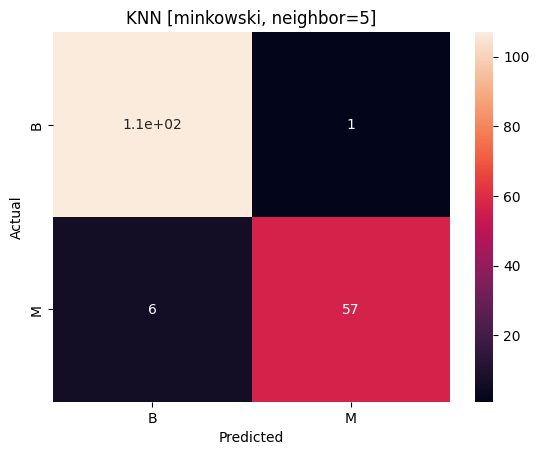

In [26]:
conf_mat=pd.crosstab (y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='KNN [minkowski, neighbor=5]')

In [33]:
models = pd.DataFrame({
    'n_neighbors': ['1', '2', '3', '4', '5'],
    'Accuracy Score': [results[0], results[1], results[2], results[3], results[4]]
})

models = models.sort_values(by='Accuracy Score')
print(models.to_string(index=False))

n_neighbors  Accuracy Score
          1        0.929825
          2        0.935673
          3        0.935673
          4        0.947368
          5        0.959064
